Archivo '../data/dataset_final.csv' cargado exitosamente.
El dataset contiene 9984 filas y 17 columnas.

Gráfico 1: Distribución de condiciones médicas por grupo etario...


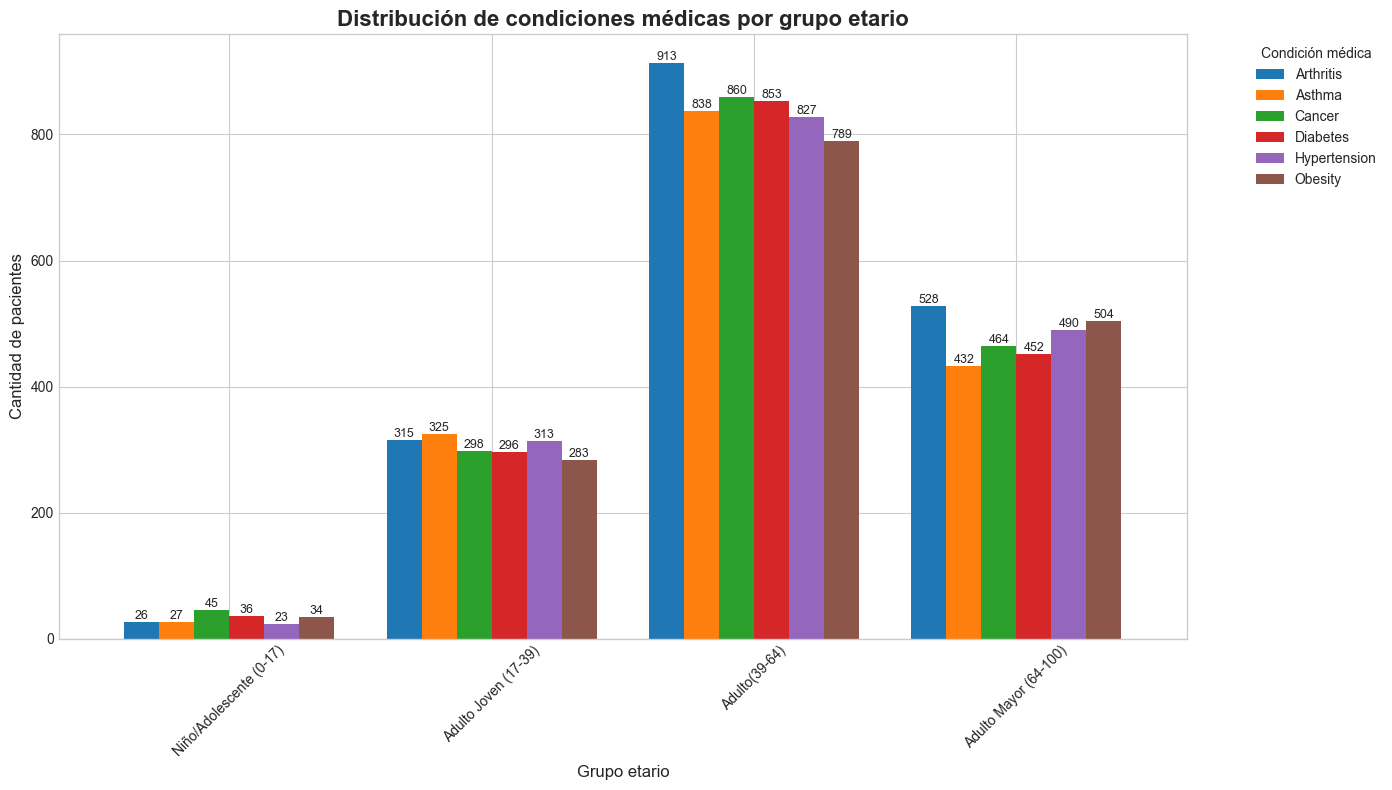

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nombre_archivo_csv = '../data/dataset_final.csv'

try:
    # leer el CSV directamente usando pandas
    df = pd.read_csv(nombre_archivo_csv)
    print(f"Archivo '{nombre_archivo_csv}' cargado exitosamente.")
    print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{nombre_archivo_csv}'.")
    exit()


# Clasificación por grupo etario
#definir rangos de edad y etiquetas correspondientes.
bins_edad = [0, 17, 39, 64, 100]
labels_edad = ["Niño/Adolescente (0-17)", "Adulto Joven (17-39)", "Adulto(39-64)", "Adulto Mayor (64-100)"]
df["Grupo_Etario"] = pd.cut(df["age"], bins=bins_edad, labels=labels_edad, right=True)

# Clasificación por categoría de IMC
# definir umbrales estándar de IMC.
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ["Bajo Peso", "Normal", "Sobrepeso", "Obesidad"]
df["Categoria_BMI"] = pd.cut(df["bmi"], bins=bins_bmi, labels=labels_bmi, right=False)

print("\nGráfico 1: Distribución de condiciones médicas por grupo etario...")

plt.style.use('seaborn-v0_8-whitegrid')
fig1, ax1 = plt.subplots(figsize=(14, 8))

conteo_condiciones = df.groupby(['Grupo_Etario', 'Medical Condition'], observed=True).size().unstack(fill_value=0)


'''Este gráfico ayuda a entender qué enfermedades son más prevalentes en diferentes etapas de la vida (niños/adolescentes, adultos jóvenes, adultos y adultos mayores). Permite identificar patrones, como la alta incidencia de diabetes e hipertensión en adultos mayores, validando la necesidad de un seguimiento enfocado en la edad los pacientes.'''

#gráfico de barras agrupadas
conteo_condiciones.plot(kind='bar', ax=ax1, width=0.8)
#etiquetas de cada paciente
for p in ax1.patches:
    ax1.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=9
    )

ax1.set_title('Distribución de condiciones médicas por grupo etario', fontsize=16, weight='bold')
ax1.set_xlabel('Grupo etario', fontsize=12)
ax1.set_ylabel('Cantidad de pacientes', fontsize=12)
ax1.tick_params(axis='x', rotation=45) #rotar etiquetas
ax1.legend(title='Condición médica', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()